This file should serve to read in the prepared data, separate it into X and y and try out the first models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nrows = 15000000
dateiName = "23_22_21-eu_combustion.csv"
fields = np.arange(19)
df = pd.read_csv(dateiName, sep = ",", usecols= fields, index_col =0, header = 0)# encoding= "utf-8", encoding_errors='replace')
df.info()

C:\Users\richa\AppData\Local\Temp\ipykernel_126700\1420137176.py:9: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dateiName, sep = ",", usecols= fields, index_col =0, header = 0)# encoding= "utf-8", encoding_errors='replace')


<class 'pandas.core.frame.DataFrame'>
Index: 26186032 entries, 56002959 to 140000058
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   member_state                 object 
 1   manufacturer_name_eu         object 
 2   vehicle_type                 object 
 3   commercial_name              object 
 4   category_of_vehicle          object 
 5   fuel_type                    object 
 6   fuel_mode                    object 
 7   innovative_technologies      object 
 8   mass_vehicle                 float64
 9   weltp_test_mass              float64
 10  engine_capacity              float64
 11  engine_power                 float64
 12  erwltp                       float64
 13  year                         int64  
 14  electric_range               float64
 15  electric_energy_consumption  float64
 16  fuel_consumption             float64
 17  specific_co2_emissions       float64
dtypes: float64(9), int64(1), object(8)
me

In [5]:
df.head()


,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,electric_energy_consumption,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0


In [6]:
# NaN-treatment, looking at percentage of Nans
missing_vals = df.isna().sum()/len(df)*100
print(missing_vals)

member_state                    0.000000
manufacturer_name_eu            0.000000
vehicle_type                    0.045666
commercial_name                 0.276949
category_of_vehicle             0.069197
fuel_type                       0.000000
fuel_mode                       0.000053
innovative_technologies        28.266253
mass_vehicle                    0.001050
weltp_test_mass                 0.736423
engine_capacity                 0.004632
engine_power                    0.165367
erwltp                         29.098219
year                            0.000000
electric_range                 90.232995
electric_energy_consumption    90.250638
fuel_consumption                8.841378
specific_co2_emissions          0.133621
dtype: float64


In [7]:

#columns with more than 70% missig values are dropped
thr = 30
columns_to_drop = []
for col, value in missing_vals.items():
    if value > thr:
        columns_to_drop.append(col)
print(columns_to_drop)

['electric_range', 'electric_energy_consumption']


In [8]:
df_pe_cleaned = df.drop(columns_to_drop, axis = 1)

In [9]:
#removing the NaNs of variables with less than 1 percent NaNs
thr = 1
columns_to_clean = []
for col, value in missing_vals.items():
    if value < thr:
        columns_to_clean.append(col)
print(columns_to_clean)

['member_state', 'manufacturer_name_eu', 'vehicle_type', 'commercial_name', 'category_of_vehicle', 'fuel_type', 'fuel_mode', 'mass_vehicle', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'year', 'specific_co2_emissions']


In [10]:
for col in columns_to_clean:
    df_pe_cleaned = df_pe_cleaned.dropna(subset=  col)

In [11]:
#removing the NaNs of variables with less than 30 and more than one percent
thr_l = 1
thr_u = 30
columns_to_repair = []
for col, value in missing_vals.items():
    if (value > thr_l) & (value < thr_u):
        columns_to_repair.append(col)
print(columns_to_repair)

['innovative_technologies', 'erwltp', 'fuel_consumption']


In [12]:
for col in columns_to_repair:
    if df_pe_cleaned[col].dtype == 'float':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mean())
    if df_pe_cleaned[col].dtype == 'object':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mode()[0])

df_pe_cleaned.head()

,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,e2 28 29,1415.0,1600.0,1598.0,100.0,1.490881,2021,5.400985,127.0


In [13]:
#cols = ["manufacturer_name_eu", "vehicle_type", "commercial_name", "category_of_vehicle","fuel_mode", "mass_vehicle"]
cols = ["commercial_name", "mass_vehicle"]# wltp-mass is taken, commercial name is no uniform format
df_pe_cleaned = df_pe_cleaned.drop(columns= cols)

#cols_f_mean = ["weltp_test_mass", "engine_capacity", "engine_power", "fuel_consumption", "specific_co2_emissions"]
#df_pe_gr=df_pe_cleaned.groupby(["year", "member_state", "fuel_type"])[cols_f_mean].apply(lambda x: x.mean()).reset_index()

In [14]:
df_pe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25869365 entries, 56002959 to 140000058
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   member_state             object 
 1   manufacturer_name_eu     object 
 2   vehicle_type             object 
 3   category_of_vehicle      object 
 4   fuel_type                object 
 5   fuel_mode                object 
 6   innovative_technologies  object 
 7   weltp_test_mass          float64
 8   engine_capacity          float64
 9   engine_power             float64
 10  erwltp                   float64
 11  year                     int64  
 12  fuel_consumption         float64
 13  specific_co2_emissions   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 2.9+ GB


In [15]:
df_pe_cleaned.to_csv("21-23_df_eu_cleaned.csv")

In [6]:
import os
import pandas as pd
if os.path.exists("21-23_df_eu_cleaned.csv"):
    df_pe_cleaned = pd.read_csv("21-23_df_eu_cleaned.csv")

In [7]:
X = df_pe_cleaned.drop(columns= ["specific_co2_emissions", "fuel_consumption"])
y1 = df_pe_cleaned["specific_co2_emissions"]
y2 = df_pe_cleaned["fuel_consumption"]

In [8]:
#selecting columns to encode

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
print(cat_cols)
print(num_cols)

Index(['member_state', 'manufacturer_name_eu', 'vehicle_type',
       'category_of_vehicle', 'fuel_type', 'fuel_mode',
       'innovative_technologies'],
      dtype='object')
Index(['ID', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'erwltp',
       'year'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in cat_cols:
    X[col] = enc.fit_transform(X[col])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols]= scaler.fit_transform(X[num_cols])

<Axes: >

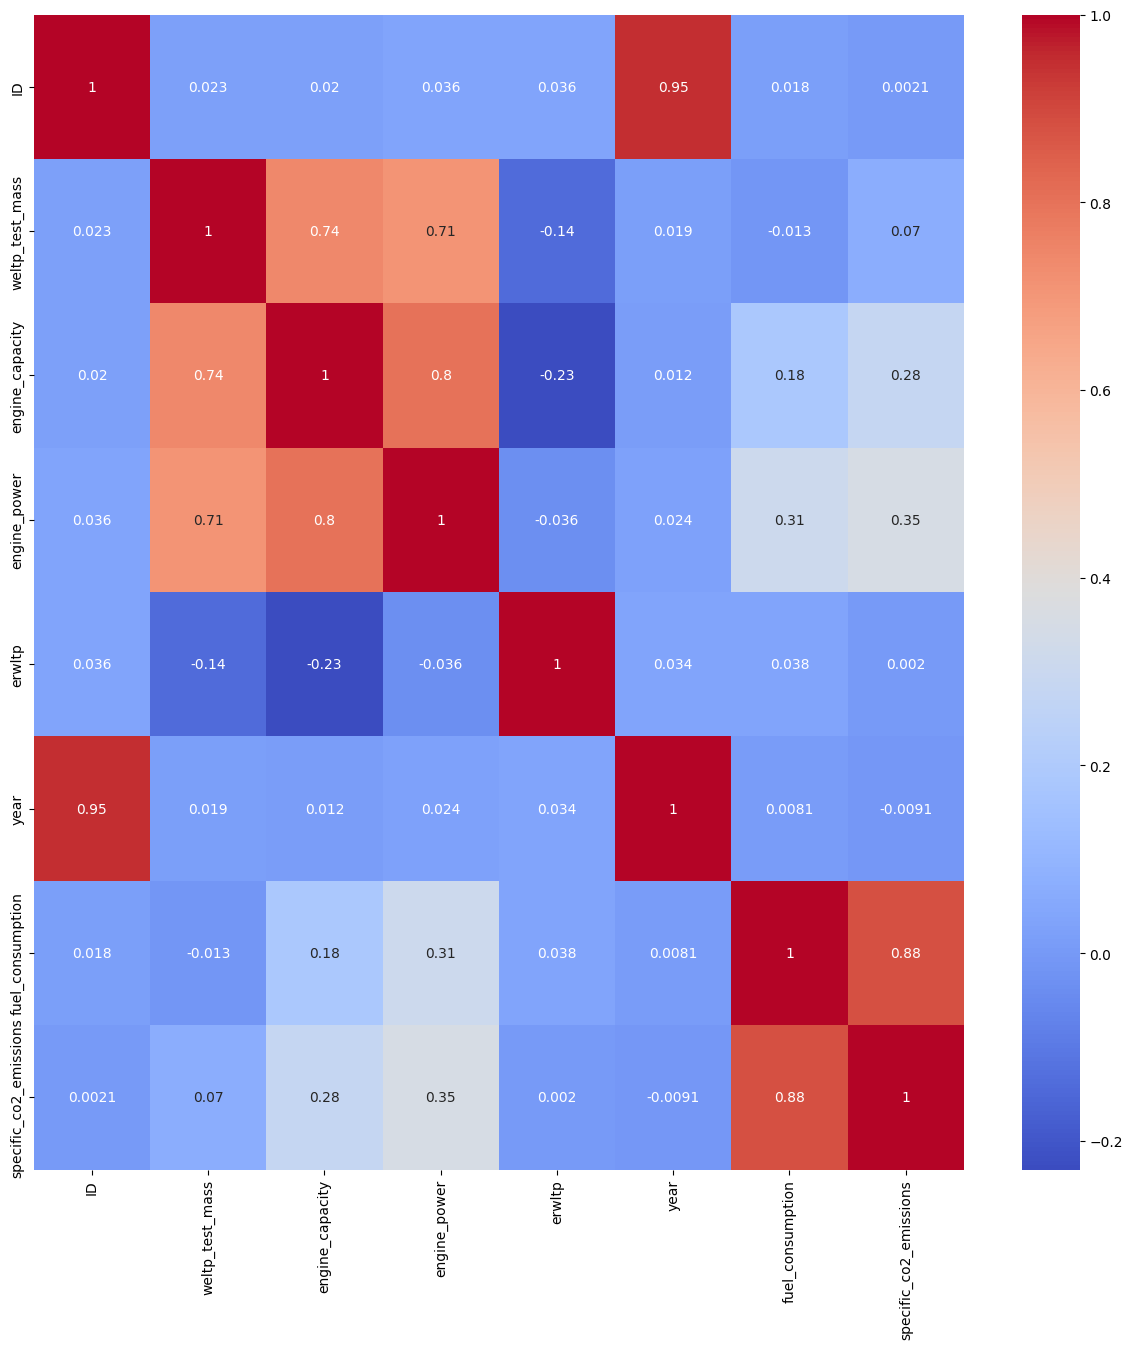

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df_pe_cleaned.select_dtypes(include=["float64", "int64"]).columns
cor = df_pe_cleaned[num_cols].corr()
fig, ax = plt.subplots(figsize= (15,15))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")

In [17]:
X.head()

,member_state,manufacturer_name_eu,vehicle_type,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,weltp_test_mass,engine_capacity,engine_power,erwltp,year
ID,,,,,,,,,,,,
56002959,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002960,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002961,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002962,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002963,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068


In [20]:
X.isna().sum()

ID                         0
member_state               0
manufacturer_name_eu       0
vehicle_type               0
category_of_vehicle        0
fuel_type                  0
fuel_mode                  0
innovative_technologies    0
weltp_test_mass            0
engine_capacity            0
engine_power               0
erwltp                     0
year                       0
dtype: int64

In [11]:
# Split the data in train and a test setz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2)

In [77]:
df_pe_cleaned.describe()

,weltp_test_mass,engine_capacity,engine_power,erwltp,year,fuel_consumption,specific_co2_emissions
count,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07
mean,1.593060e+03,1.535608e+03,1.036400e+02,1.490881e+00,2.022006e+03,5.400985e+00,1.260269e+02
std,3.432701e+02,5.134010e+02,4.905862e+01,4.235855e-01,8.303425e-01,1.649642e+00,4.120933e+01
min,6.150000e+02,6.470000e+02,8.000000e+00,5.000000e-01,2.021000e+03,1.000000e-01,0.000000e+00
25%,1.349000e+03,1.197000e+03,7.200000e+01,1.180000e+00,2.021000e+03,4.900000e+00,1.150000e+02
50%,1.531000e+03,1.497000e+03,9.600000e+01,1.490881e+00,2.022000e+03,5.400985e+00,1.280000e+02
75%,1.770000e+03,1.968000e+03,1.120000e+02,1.870000e+00,2.023000e+03,6.000000e+00,1.430000e+02
max,4.711000e+03,7.993000e+03,1.177000e+03,3.200000e+00,2.023000e+03,2.520000e+01,5.720000e+02


Text(0.5, 1.0, 'Distribution of specific_co2_emssions ')

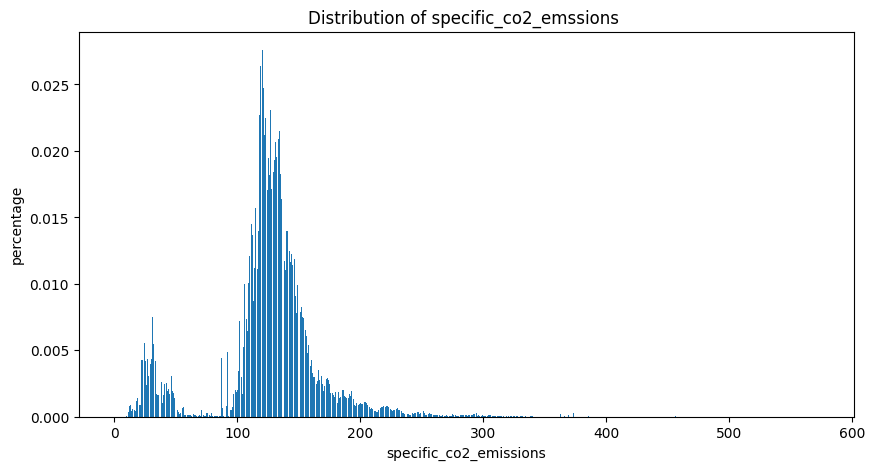

In [36]:
plt.figure(figsize=(10,5))


df =df_pe_cleaned["specific_co2_emissions"].value_counts(normalize=True)
plt.bar(df.index, df.values)
plt.xlabel("specific_co2_emissions")
plt.ylabel("percentage")
plt.title("Distribution of specific_co2_emssions ")

In [40]:
# Trying out LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Testing LinearRegression for predicting the CO2-emission   

lr = LinearRegression()
lr.fit(X_train, y_train)

#score of LinearRegression
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("score_train:",score_train)
print("score_test:",score_test)

# mean squared Error
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


score_train: 0.40115750230366165
score_test: 0.400398582375289
rmse training data:  31.89665327867576
rmse test data:  31.8825578984657


In [41]:
#trying out RidgeCV
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas =[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)
print("alpha used:",ridge_reg.alpha_)
sc_train = ridge_reg.score(X_train, y_train)
sc_test = ridge_reg.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

alpha used: 10.0
score:  0.39962405231131815
score:  0.40038345060587377
rmse training data:  31.917261105886507
rmse test data:  31.903143265230263


In [42]:
#trying out lasso  regression
from sklearn.linear_model import LassoCV
lasso_r = LassoCV()
lasso_r.fit(X_train, y_train)
#lasso coefficients:
print(lasso_r.coef_)
print("alpha used: ", lasso_r.alpha_)

#scores
sc_train = lasso_r.score(X_train, y_train)
sc_test = lasso_r.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = lasso_r.predict(X_train)
y_pred_te = lasso_r.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


[-1.45331988e-01  6.13633460e-02 -1.41278213e-02  0.00000000e+00
 -4.62644935e+00 -1.41552145e+01 -7.62001120e-03 -1.22448403e+01
  0.00000000e+00  2.24089605e+01  8.50375788e-01 -0.00000000e+00]
alpha used:  1.2705477228357498
score:  0.3901635014673601
score:  0.3907637812553151
rmse training data:  32.17226727730903
rmse test data:  32.153521035666074


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

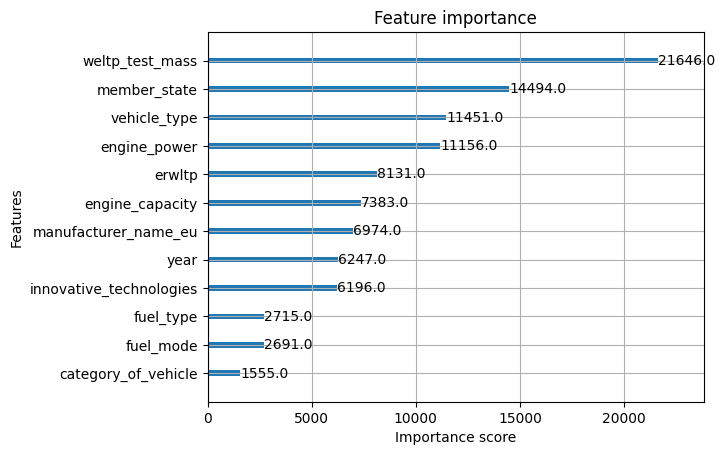

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, learning_rate =0.3,   max_depth=7, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

xgb.plot_importance(model, ax = plt.gca())




In [46]:

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
sc_train = model.score(X_train, y_train)
sc_test = model.score(X_test, y_test)
print("score: ", sc_train)
print("score: ", sc_test)

# mean squared Error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_te = np.sqrt(mean_squared_error(y_pred_test, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

score:  0.9967100660898573
score:  0.9965820237807083
rmse training data:  2.3641901189963757
rmse test data:  2.4071677146392383


In [13]:
# reducing data to 10 percent of the data due to computation time
batch_size= int(0.01*X_train.shape[0])
X_train_batch= X_train[:batch_size]
y_train_batch=y_train[:batch_size]

explained variance:  [6.40571987e+04 2.84283733e+03 7.59231850e+02 4.82701994e+01
 6.81118656e+00 2.29822887e+00 1.86550335e+00 9.43030600e-01
 4.77049156e-01 2.53001059e-01 1.48889460e-01 5.02021545e-02
 3.21416265e-02]


Text(0.5, 1.0, 'Eigenvalues over number of factors')

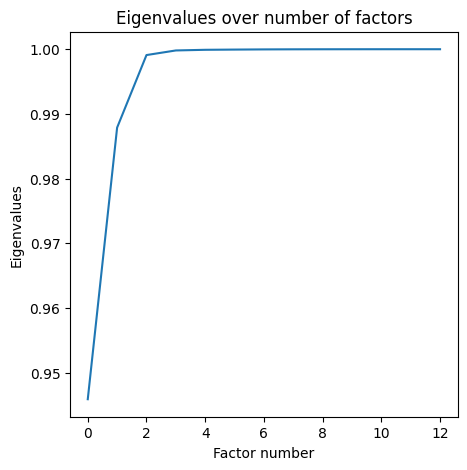

In [15]:
# for runtime reasons I try a dimensionreduction with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pca = PCA()
X_train_batch_re = pca.fit_transform(X_train_batch)
print("explained variance: ", pca.explained_variance_)

plt.figure(figsize = (5,5))
plt.plot(range(X_train_batch.shape[1]), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Factor number")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues over number of factors")

In [ ]:
# gridSearch für verschiedene Modelle
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Modelle und ihre Hyperparameter definieren
models = {
    'XGBRegressoer': (XGBRegressor(), {'n_estimators': [ 500, 1000], 'learning_rate': [0.2, 0.3]}),
    #'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]})
}

# Ergebnisse speichern
results = {}

# Grid-Search für jedes Modell durchführen
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_batch_re, y_train_batch)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }

In [ ]:
# Grid-Search für jedes Modell durchführen
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Best Hyperparameters: {result['best_params']}")
    print(f"  Best Score (MSE): {result['best_score']:.4f}\n")

XGBRegressoer:
  Beste Hyperparameter: {'learning_rate': 0.2, 'n_estimators': 1000}
  Bester Score (MSE): 3.7237

DecisionTreeRegressor:
  Beste Hyperparameter: {'max_depth': None}
  Bester Score (MSE): 5.1530



In [16]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Ergebnisse ausgeben
results={}

# Modelle und ihre Hyperparameter definieren
models = {
    #'XGBRegressoer': (XGBRegressor(), {'n_estimators': [10, 1000], 'learning_rate': [0.1, 0.3, 0.5]}),
    #'LinearRegression': (LinearRegression(), {}),
    'ExtraTreeRegressor': (ExtraTreeRegressor(), {'max_depth': [None, 5, 15]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 100], 'max_depth': [None, 10]})
}

# Randomized Search to save computation power
for model_name, (model, params) in models.items():
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs = 2)
    grid_search.fit(X_train_batch_re, y_train_batch)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }


c:\Users\richa\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\richa\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [17]:
# Ergebnisse ausgeben
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Beste Hyperparameter: {result['best_params']}")
    print(f"  Bester Score (RMSE): {result['best_score']:.4f}\n")


ExtraTreeRegressor:
  Beste Hyperparameter: {'max_depth': None}
  Bester Score (RMSE): 5.2457



XGBRegressoer:
  Beste Hyperparameter: {'n_estimators': 1000, 'learning_rate': 0.3}
  Bester Score (RMSE): 3.7590

DecisionTreeRegressor:
  Beste Hyperparameter: {'max_depth': None}
  Bester Score (RMSE): 5.0182

In [19]:
# fitting of XGBRegressor with the best parameters
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.3)
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.4015041076320984
Mean Squared Error: 6.198890219863985
R-squared: 0.9963505057274576


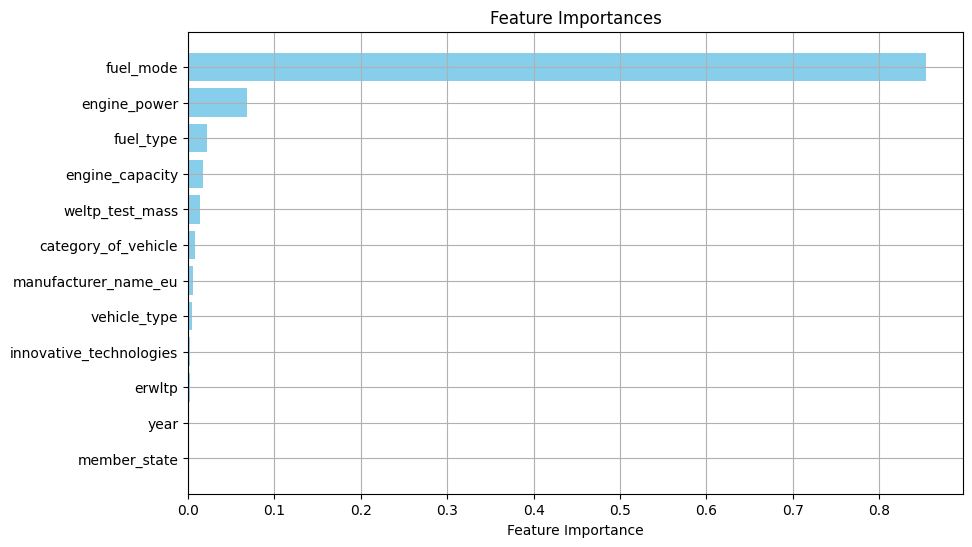

In [20]:
# feature importances for XGBRegressor
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
sorted_features = [features[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # inverting y-axis
plt.grid()
plt.show()

In [32]:
# fitting of DecisionTreeRegressor with best parameters
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = None )
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.6780933210472021
Mean Squared Error: 3.649926844614862
R-squared: 0.9978511658309521


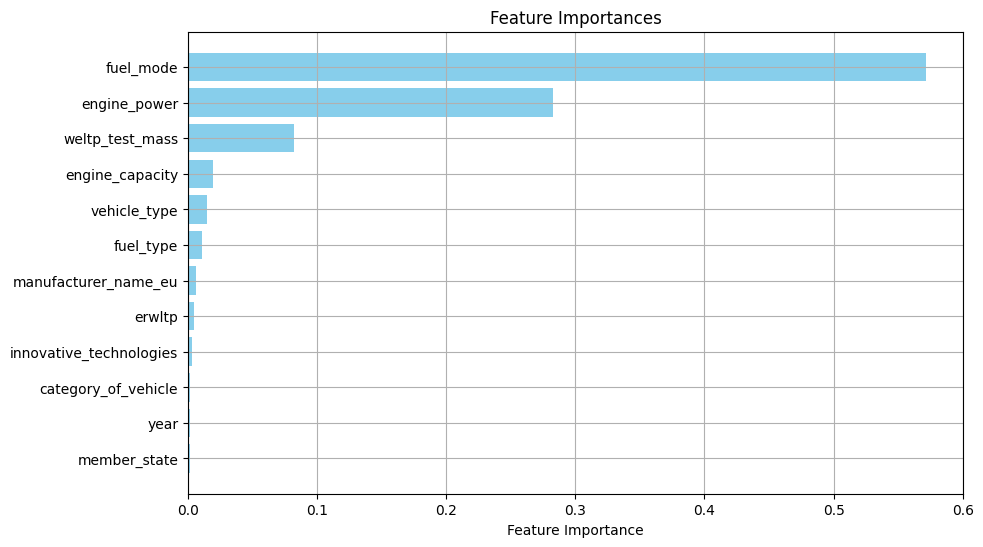

In [ ]:
# feature importances for DecisionTreeRegressor
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
sorted_features = [features[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # inverting y-axis
plt.grid()
plt.show()

In [ ]:
# Displaying the decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [72]:
# Machine learning part 
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)
   
from tensorflow.python import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error
# reducing data to 10 percent of the data due to computation time
batch_size= int(0.02*X_train.shape[0])
X_train_batch= X_train[:batch_size]
y_train_batch=y_train[:batch_size]

features = len(X_train_batch.columns)
# adjustable parameters
epochs= 15
bs=96
dropout=0.01

# creating a model
model = keras.Sequential()
model.add(Dense(64, activation="relu", input_shape=(features,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout)) # Korrektur des Dropout-Wertes
model.add(Dense(1, activation='linear')) # Verwendung von linear für Regression

# Ausgabe für spezifische CO2-Emissionen
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_absolute_error"]) # Metrik angepasst
# changing the data format for the model

X_train_batch = X_train_batch.values
y_train_batch = y_train_batch.values  

# model training
model_history = model.fit(X_train_batch, y_train_batch, epochs=epochs, batch_size=bs) # Epochen und Batch-Größe hinzugefügt

# evaluating model
y_pred_train = model.predict(X_train_batch)
y_pred_test = model.predict(X_test)

print("rmse_train: ", np.sqrt(mean_squared_error(y_pred_train, y_train_batch)))
print("rmse_test: ", np.sqrt(mean_squared_error(y_pred_test, y_test)))


2.12.0
Epoch 1/15
4312/4312 [==============================] - 6s 1ms/step - loss: 1326.1050 - mean_absolute_error: 26.4831
Epoch 2/15
4312/4312 [==============================] - 6s 1ms/step - loss: 334.8000 - mean_absolute_error: 12.4152
Epoch 3/15
4312/4312 [==============================] - 6s 1ms/step - loss: 193.2713 - mean_absolute_error: 9.5542
Epoch 4/15
4312/4312 [==============================] - 6s 1ms/step - loss: 150.3085 - mean_absolute_error: 8.5533
Epoch 5/15
4312/4312 [==============================] - 6s 1ms/step - loss: 131.9404 - mean_absolute_error: 8.0375
Epoch 6/15
4312/4312 [==============================] - 6s 1ms/step - loss: 117.0543 - mean_absolute_error: 7.5777
Epoch 7/15
4312/4312 [==============================] - 5s 1ms/step - loss: 109.8077 - mean_absolute_error: 7.3351
Epoch 8/15
4312/4312 [==============================] - 6s 1ms/step - loss: 103.6003 - mean_absolute_error: 7.1333
Epoch 9/15
4312/4312 [==============================] - 6s 1ms/step - 

In [73]:
# classification report
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


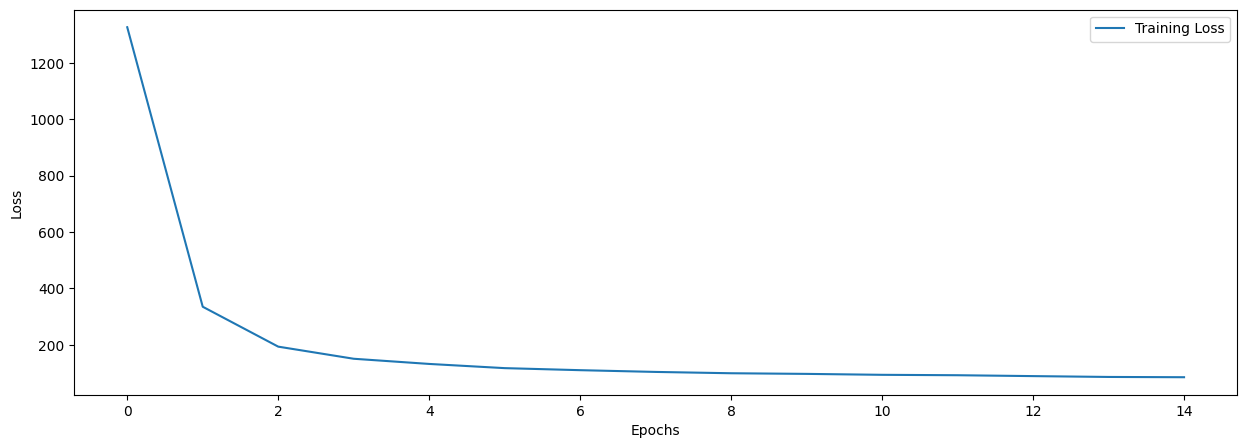

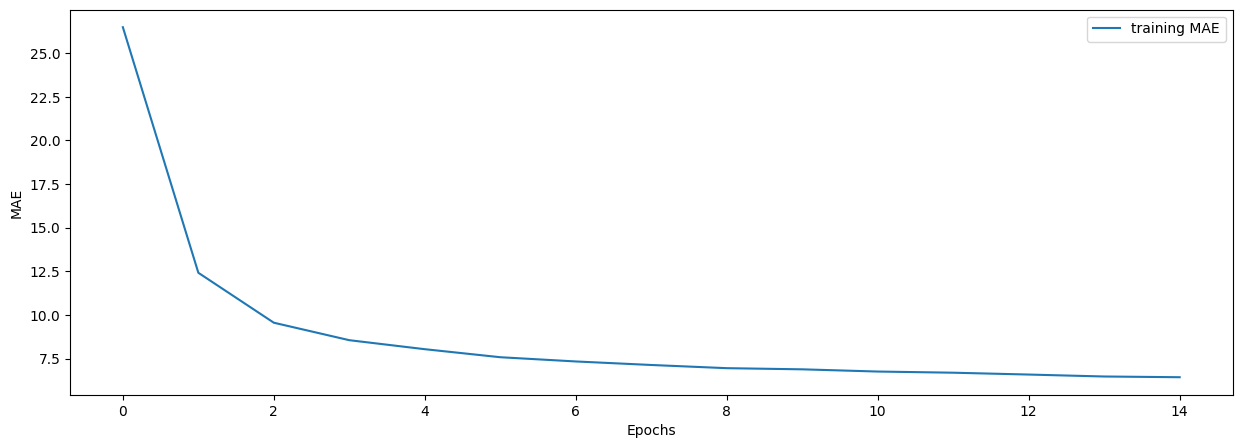

In [74]:
train_loss= model_history.history['loss']
train_mae= model_history.history['mean_absolute_error']


plt.figure(figsize=(15,5))
plt.plot(train_loss, label='Training Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show

plt.figure(figsize=(15,5))
plt.plot(train_mae, label='training MAE')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MAE")  
plt.show() 

Result of the first improvement increasing dropout from 0.5 to 0.8
2.12.0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12935/12935 [==============================] - 10s 740us/step - loss: 3548.9937 - mean_absolute_error: 48.0226
Epoch 2/100
12935/12935 [==============================] - 9s 724us/step - loss: 2268.2620 - mean_absolute_error: 37.4700
Epoch 3/100
12935/12935 [==============================] - 10s 779us/step - loss: 1697.6364 - mean_absolute_error: 31.8960
Epoch 4/100
12935/12935 [==============================] - 11s 871us/step - loss: 1404.8551 - mean_absolute_error: 28.7148
Epoch 5/100
12935/12935 [==============================] - 11s 851us/step - loss: 1157.4849 - mean_absolute_error: 25.9846
Epoch 6/100
12935/12935 [==============================] - 11s 857us/step - loss: 964.4026 - mean_absolute_error: 23.7382
Epoch 7/100
12935/12935 [==============================] - 13s 983us/step - loss: 833.4805 - mean_absolute_error: 21.9924
Epoch 8/100
12935/12935 [==============================] - 11s 818us/step - loss: 737.4310 - mean_absolute_error: 20.4528
Epoch 9/100
12935/12935 [==============================] - 11s 835us/step - loss: 678.7991 - mean_absolute_error: 19.2562
Epoch 10/100
12935/12935 [==============================] - 11s 856us/step - loss: 646.1638 - mean_absolute_error: 18.3902
Epoch 11/100
12935/12935 [==============================] - 11s 832us/step - loss: 624.9501 - mean_absolute_error: 17.7314
Epoch 12/100
12935/12935 [==============================] - 13s 992us/step - loss: 599.6581 - mean_absolute_error: 17.1103
Epoch 13/100
12935/12935 [==============================] - 12s 897us/step - loss: 570.2427 - mean_absolute_error: 16.4437
Epoch 14/100
12935/12935 [==============================] - 11s 878us/step - loss: 557.6116 - mean_absolute_error: 16.0910
Epoch 15/100
12935/12935 [==============================] - 11s 855us/step - loss: 554.1472 - mean_absolute_error: 15.9140
Epoch 16/100
12935/12935 [==============================] - 12s 938us/step - loss: 546.2079 - mean_absolute_error: 15.6968
Epoch 17/100
12935/12935 [==============================] - 11s 888us/step - loss: 521.5026 - mean_absolute_error: 15.3017
Epoch 18/100
12935/12935 [==============================] - 11s 861us/step - loss: 516.6891 - mean_absolute_error: 15.1102
Epoch 19/100
12935/12935 [==============================] - 12s 892us/step - loss: 511.5810 - mean_absolute_error: 14.9791
Epoch 20/100
12935/12935 [==============================] - 12s 948us/step - loss: 507.0320 - mean_absolute_error: 14.8257
Epoch 21/100
12935/12935 [==============================] - 11s 847us/step - loss: 507.6003 - mean_absolute_error: 14.7698
Epoch 22/100
12935/12935 [==============================] - 11s 830us/step - loss: 507.9704 - mean_absolute_error: 14.7145
Epoch 23/100
12935/12935 [==============================] - 12s 927us/step - loss: 504.5376 - mean_absolute_error: 14.6423
Epoch 24/100
12935/12935 [==============================] - 10s 799us/step - loss: 502.1022 - mean_absolute_error: 14.5739
Epoch 25/100
12935/12935 [==============================] - 11s 822us/step - loss: 503.5984 - mean_absolute_error: 14.6137
Epoch 26/100
12935/12935 [==============================] - 12s 940us/step - loss: 501.9889 - mean_absolute_error: 14.5697
Epoch 27/100
12935/12935 [==============================] - 11s 813us/step - loss: 502.4590 - mean_absolute_error: 14.5784
Epoch 28/100
12935/12935 [==============================] - 10s 790us/step - loss: 499.5409 - mean_absolute_error: 14.5395
Epoch 29/100
12935/12935 [==============================] - 11s 850us/step - loss: 499.5482 - mean_absolute_error: 14.5164
Epoch 30/100
12935/12935 [==============================] - 12s 916us/step - loss: 500.0045 - mean_absolute_error: 14.5147
Epoch 31/100
12935/12935 [==============================] - 10s 797us/step - loss: 499.4193 - mean_absolute_error: 14.5233
Epoch 32/100
12935/12935 [==============================] - 11s 827us/step - loss: 500.2649 - mean_absolute_error: 14.5463
Epoch 33/100
12935/12935 [==============================] - 12s 949us/step - loss: 497.8140 - mean_absolute_error: 14.5088
Epoch 34/100
12935/12935 [==============================] - 10s 800us/step - loss: 496.5905 - mean_absolute_error: 14.5103
Epoch 35/100
12935/12935 [==============================] - 74s 6ms/step - loss: 491.2451 - mean_absolute_error: 14.4437
Epoch 36/100
12935/12935 [==============================] - 12s 950us/step - loss: 496.1498 - mean_absolute_error: 14.5009
Epoch 37/100
12935/12935 [==============================] - 12s 892us/step - loss: 494.1390 - mean_absolute_error: 14.4661
Epoch 38/100
12935/12935 [==============================] - 13s 1ms/step - loss: 495.6604 - mean_absolute_error: 14.5030
Epoch 39/100
12935/12935 [==============================] - 12s 950us/step - loss: 492.2376 - mean_absolute_error: 14.4486
Epoch 40/100
12935/12935 [==============================] - 14s 1ms/step - loss: 493.7956 - mean_absolute_error: 14.4702
Epoch 41/100
12935/12935 [==============================] - 13s 1ms/step - loss: 494.5812 - mean_absolute_error: 14.4654
Epoch 42/100
12935/12935 [==============================] - 13s 994us/step - loss: 493.2326 - mean_absolute_error: 14.4552
Epoch 43/100
12935/12935 [==============================] - 14s 1ms/step - loss: 495.5115 - mean_absolute_error: 14.4613
Epoch 44/100
12935/12935 [==============================] - 13s 979us/step - loss: 491.7852 - mean_absolute_error: 14.4302
Epoch 45/100
12935/12935 [==============================] - 12s 951us/step - loss: 496.0016 - mean_absolute_error: 14.4596
Epoch 46/100
12935/12935 [==============================] - 14s 1ms/step - loss: 491.6219 - mean_absolute_error: 14.4232
Epoch 47/100
12935/12935 [==============================] - 12s 899us/step - loss: 490.6406 - mean_absolute_error: 14.4285
Epoch 48/100
12935/12935 [==============================] - 11s 843us/step - loss: 491.6806 - mean_absolute_error: 14.4035
Epoch 49/100
12935/12935 [==============================] - 12s 923us/step - loss: 491.6383 - mean_absolute_error: 14.3964
Epoch 50/100
12935/12935 [==============================] - 10s 784us/step - loss: 495.7390 - mean_absolute_error: 14.4552
Epoch 51/100
12935/12935 [==============================] - 10s 769us/step - loss: 490.2372 - mean_absolute_error: 14.3708
Epoch 52/100
12935/12935 [==============================] - 10s 811us/step - loss: 490.6095 - mean_absolute_error: 14.3897
Epoch 53/100
12935/12935 [==============================] - 12s 891us/step - loss: 493.0993 - mean_absolute_error: 14.4172
Epoch 54/100
12935/12935 [==============================] - 10s 801us/step - loss: 493.2562 - mean_absolute_error: 14.4173
Epoch 55/100
12935/12935 [==============================] - 11s 829us/step - loss: 490.8478 - mean_absolute_error: 14.4119
Epoch 56/100
12935/12935 [==============================] - 12s 958us/step - loss: 490.1198 - mean_absolute_error: 14.3788
Epoch 57/100
12935/12935 [==============================] - 11s 826us/step - loss: 493.5057 - mean_absolute_error: 14.4099
Epoch 58/100
12935/12935 [==============================] - 11s 818us/step - loss: 488.8793 - mean_absolute_error: 14.3423
Epoch 59/100
12935/12935 [==============================] - 12s 922us/step - loss: 489.0653 - mean_absolute_error: 14.3647
Epoch 60/100
12935/12935 [==============================] - 13s 979us/step - loss: 491.4051 - mean_absolute_error: 14.3890
Epoch 61/100
12935/12935 [==============================] - 11s 846us/step - loss: 489.5279 - mean_absolute_error: 14.3758
Epoch 62/100
12935/12935 [==============================] - 11s 850us/step - loss: 491.3799 - mean_absolute_error: 14.3915
Epoch 63/100
12935/12935 [==============================] - 11s 839us/step - loss: 484.1547 - mean_absolute_error: 14.2979
Epoch 64/100
12935/12935 [==============================] - 11s 863us/step - loss: 489.6230 - mean_absolute_error: 14.3441
Epoch 65/100
12935/12935 [==============================] - 11s 861us/step - loss: 490.0142 - mean_absolute_error: 14.3428
Epoch 66/100
12935/12935 [==============================] - 12s 916us/step - loss: 489.7840 - mean_absolute_error: 14.3641
Epoch 67/100
12935/12935 [==============================] - 10s 799us/step - loss: 489.3947 - mean_absolute_error: 14.3631
Epoch 68/100
12935/12935 [==============================] - 10s 809us/step - loss: 487.8364 - mean_absolute_error: 14.3157
Epoch 69/100
12935/12935 [==============================] - 12s 900us/step - loss: 486.2559 - mean_absolute_error: 14.3149
Epoch 70/100
12935/12935 [==============================] - 10s 807us/step - loss: 487.0957 - mean_absolute_error: 14.3226
Epoch 71/100
12935/12935 [==============================] - 10s 802us/step - loss: 488.5804 - mean_absolute_error: 14.3276
Epoch 72/100
12935/12935 [==============================] - 11s 854us/step - loss: 486.3262 - mean_absolute_error: 14.2869
Epoch 73/100
12935/12935 [==============================] - 12s 890us/step - loss: 487.6838 - mean_absolute_error: 14.2914
Epoch 74/100
12935/12935 [==============================] - 11s 817us/step - loss: 488.0554 - mean_absolute_error: 14.3129
Epoch 75/100
12935/12935 [==============================] - 11s 828us/step - loss: 488.1486 - mean_absolute_error: 14.2989
Epoch 76/100
12935/12935 [==============================] - 13s 969us/step - loss: 488.7389 - mean_absolute_error: 14.2930
Epoch 77/100
12935/12935 [==============================] - 11s 817us/step - loss: 487.7503 - mean_absolute_error: 14.2909
Epoch 78/100
12935/12935 [==============================] - 10s 795us/step - loss: 488.1329 - mean_absolute_error: 14.3009
Epoch 79/100
12935/12935 [==============================] - 11s 872us/step - loss: 487.0832 - mean_absolute_error: 14.2928
Epoch 80/100
12935/12935 [==============================] - 11s 827us/step - loss: 485.8548 - mean_absolute_error: 14.2637
Epoch 81/100
12935/12935 [==============================] - 10s 807us/step - loss: 485.5218 - mean_absolute_error: 14.2885
Epoch 82/100
12935/12935 [==============================] - 11s 832us/step - loss: 485.9947 - mean_absolute_error: 14.2802
Epoch 83/100
12935/12935 [==============================] - 12s 936us/step - loss: 486.9093 - mean_absolute_error: 14.2945
Epoch 84/100
12935/12935 [==============================] - 10s 809us/step - loss: 484.9247 - mean_absolute_error: 14.2598
Epoch 85/100
12935/12935 [==============================] - 10s 797us/step - loss: 489.3830 - mean_absolute_error: 14.3107
Epoch 86/100
12935/12935 [==============================] - 12s 930us/step - loss: 484.8739 - mean_absolute_error: 14.2465
Epoch 87/100
12935/12935 [==============================] - 10s 782us/step - loss: 489.2449 - mean_absolute_error: 14.3113
Epoch 88/100
12935/12935 [==============================] - 10s 800us/step - loss: 488.3688 - mean_absolute_error: 14.3093
Epoch 89/100
12935/12935 [==============================] - 11s 869us/step - loss: 487.0750 - mean_absolute_error: 14.2978
Epoch 90/100
12935/12935 [==============================] - 12s 910us/step - loss: 486.4270 - mean_absolute_error: 14.2756
Epoch 91/100
12935/12935 [==============================] - 10s 783us/step - loss: 484.6397 - mean_absolute_error: 14.2599
Epoch 92/100
12935/12935 [==============================] - 10s 788us/step - loss: 485.7536 - mean_absolute_error: 14.2454
Epoch 93/100
12935/12935 [==============================] - 12s 909us/step - loss: 484.1292 - mean_absolute_error: 14.2459
Epoch 94/100
12935/12935 [==============================] - 10s 790us/step - loss: 488.9378 - mean_absolute_error: 14.2947
Epoch 95/100
12935/12935 [==============================] - 10s 803us/step - loss: 487.1333 - mean_absolute_error: 14.2759
Epoch 96/100
12935/12935 [==============================] - 13s 1ms/step - loss: 487.8047 - mean_absolute_error: 14.2756
Epoch 97/100
12935/12935 [==============================] - 11s 829us/step - loss: 485.2804 - mean_absolute_error: 14.2475
Epoch 98/100
12935/12935 [==============================] - 10s 806us/step - loss: 490.3946 - mean_absolute_error: 14.2964
Epoch 99/100
12935/12935 [==============================] - 10s 788us/step - loss: 485.6153 - mean_absolute_error: 14.2686
Epoch 100/100
12935/12935 [==============================] - 12s 930us/step - loss: 486.5427 - mean_absolute_error: 14.2546
rmse_train:  13.542287934666478
rmse_test:  13.52130174724042

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/40
12935/12935 [==============================] - 10s 727us/step - loss: 1628.6665 - mean_absolute_error: 31.0014
Epoch 2/40
12935/12935 [==============================] - 11s 823us/step - loss: 857.6368 - mean_absolute_error: 22.1718
Epoch 3/40
12935/12935 [==============================] - 10s 735us/step - loss: 718.1768 - mean_absolute_error: 20.1910
Epoch 4/40
12935/12935 [==============================] - 11s 816us/step - loss: 625.3881 - mean_absolute_error: 18.8078
Epoch 5/40
12935/12935 [==============================] - 11s 834us/step - loss: 548.0593 - mean_absolute_error: 17.5345
Epoch 6/40
12935/12935 [==============================] - 13s 970us/step - loss: 484.4332 - mean_absolute_error: 16.4569
Epoch 7/40
12935/12935 [==============================] - 11s 813us/step - loss: 423.0951 - mean_absolute_error: 15.4031
Epoch 8/40
12935/12935 [==============================] - 11s 823us/step - loss: 380.8181 - mean_absolute_error: 14.6158
Epoch 9/40
12935/12935 [==============================] - 13s 970us/step - loss: 355.3503 - mean_absolute_error: 14.1371
Epoch 10/40
12935/12935 [==============================] - 11s 827us/step - loss: 334.4200 - mean_absolute_error: 13.7339
Epoch 11/40
12935/12935 [==============================] - 11s 836us/step - loss: 323.0861 - mean_absolute_error: 13.4295
Epoch 12/40
12935/12935 [==============================] - 12s 943us/step - loss: 313.0407 - mean_absolute_error: 13.2052
Epoch 13/40
12935/12935 [==============================] - 11s 880us/step - loss: 307.7699 - mean_absolute_error: 13.0415
Epoch 14/40
12935/12935 [==============================] - 11s 835us/step - loss: 301.7828 - mean_absolute_error: 12.8796
Epoch 15/40
12935/12935 [==============================] - 12s 960us/step - loss: 297.5753 - mean_absolute_error: 12.7815
Epoch 16/40
12935/12935 [==============================] - 13s 971us/step - loss: 295.7373 - mean_absolute_error: 12.6810
Epoch 17/40
12935/12935 [==============================] - 11s 828us/step - loss: 292.8227 - mean_absolute_error: 12.5957
Epoch 18/40
12935/12935 [==============================] - 11s 836us/step - loss: 292.6726 - mean_absolute_error: 12.5603
Epoch 19/40
12935/12935 [==============================] - 12s 952us/step - loss: 293.9421 - mean_absolute_error: 12.5552
Epoch 20/40
12935/12935 [==============================] - 10s 793us/step - loss: 290.9254 - mean_absolute_error: 12.4834
Epoch 21/40
12935/12935 [==============================] - 10s 809us/step - loss: 290.6456 - mean_absolute_error: 12.4691
Epoch 22/40
12935/12935 [==============================] - 13s 976us/step - loss: 287.8074 - mean_absolute_error: 12.4166
Epoch 23/40
12935/12935 [==============================] - 11s 836us/step - loss: 290.6653 - mean_absolute_error: 12.4467
Epoch 24/40
12935/12935 [==============================] - 11s 843us/step - loss: 288.9409 - mean_absolute_error: 12.3967
Epoch 25/40
12935/12935 [==============================] - 12s 914us/step - loss: 286.8492 - mean_absolute_error: 12.3799
Epoch 26/40
12935/12935 [==============================] - 13s 993us/step - loss: 290.5449 - mean_absolute_error: 12.4214
Epoch 27/40
12935/12935 [==============================] - 12s 904us/step - loss: 289.0250 - mean_absolute_error: 12.3817
Epoch 28/40
12935/12935 [==============================] - 11s 842us/step - loss: 285.4147 - mean_absolute_error: 12.3266
Epoch 29/40
12935/12935 [==============================] - 904s 70ms/step - loss: 284.5812 - mean_absolute_error: 12.2836
Epoch 30/40
12935/12935 [==============================] - 13s 972us/step - loss: 290.9087 - mean_absolute_error: 12.3614
Epoch 31/40
12935/12935 [==============================] - 9s 720us/step - loss: 280.6434 - mean_absolute_error: 12.2090
Epoch 32/40
12935/12935 [==============================] - 9s 727us/step - loss: 283.7460 - mean_absolute_error: 12.2619
Epoch 33/40
12935/12935 [==============================] - 10s 756us/step - loss: 281.7361 - mean_absolute_error: 12.2314
Epoch 34/40
12935/12935 [==============================] - 11s 838us/step - loss: 284.3835 - mean_absolute_error: 12.2627
Epoch 35/40
12935/12935 [==============================] - 13s 987us/step - loss: 280.7230 - mean_absolute_error: 12.1968
Epoch 36/40
12935/12935 [==============================] - 11s 830us/step - loss: 283.4069 - mean_absolute_error: 12.2509
Epoch 37/40
12935/12935 [==============================] - 11s 833us/step - loss: 281.3747 - mean_absolute_error: 12.2133
Epoch 38/40
12935/12935 [==============================] - 11s 882us/step - loss: 279.9593 - mean_absolute_error: 12.1741
Epoch 39/40
12935/12935 [==============================] - 12s 910us/step - loss: 281.1382 - mean_absolute_error: 12.2107
Epoch 40/40
12935/12935 [==============================] - 11s 827us/step - loss: 280.5408 - mean_absolute_error: 12.1961
rmse_train:  11.617539117517058
rmse_test:  11.58332687737999

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_15 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/25
12935/12935 [==============================] - 11s 843us/step - loss: 1457.2698 - mean_absolute_error: 29.0631
Epoch 2/25
12935/12935 [==============================] - 9s 714us/step - loss: 669.3535 - mean_absolute_error: 19.4349
Epoch 3/25
12935/12935 [==============================] - 9s 723us/step - loss: 485.3424 - mean_absolute_error: 16.4385
Epoch 4/25
12935/12935 [==============================] - 10s 742us/step - loss: 400.6514 - mean_absolute_error: 14.9513
Epoch 5/25
12935/12935 [==============================] - 13s 1ms/step - loss: 345.1610 - mean_absolute_error: 13.9324
Epoch 6/25
12935/12935 [==============================] - 11s 834us/step - loss: 301.1937 - mean_absolute_error: 13.0233
Epoch 7/25
12935/12935 [==============================] - 11s 846us/step - loss: 269.6367 - mean_absolute_error: 12.3043
Epoch 8/25
12935/12935 [==============================] - 13s 977us/step - loss: 245.0654 - mean_absolute_error: 11.6634
Epoch 9/25
12935/12935 [==============================] - 11s 855us/step - loss: 225.2153 - mean_absolute_error: 11.1476
Epoch 10/25
12935/12935 [==============================] - 11s 837us/step - loss: 217.0280 - mean_absolute_error: 10.9172
Epoch 11/25
12935/12935 [==============================] - 12s 942us/step - loss: 212.8567 - mean_absolute_error: 10.7933
Epoch 12/25
12935/12935 [==============================] - 11s 846us/step - loss: 203.9404 - mean_absolute_error: 10.5698
Epoch 13/25
12935/12935 [==============================] - 11s 821us/step - loss: 199.3514 - mean_absolute_error: 10.3954
Epoch 14/25
12935/12935 [==============================] - 12s 902us/step - loss: 191.1560 - mean_absolute_error: 10.1440
Epoch 15/25
12935/12935 [==============================] - 13s 974us/step - loss: 186.2048 - mean_absolute_error: 10.0142
Epoch 16/25
12935/12935 [==============================] - 11s 826us/step - loss: 182.2557 - mean_absolute_error: 9.8872
Epoch 17/25
12935/12935 [==============================] - 11s 860us/step - loss: 195.8745 - mean_absolute_error: 10.1241
Epoch 18/25
12935/12935 [==============================] - 13s 994us/step - loss: 180.6093 - mean_absolute_error: 9.8059
Epoch 19/25
12935/12935 [==============================] - 11s 864us/step - loss: 171.9335 - mean_absolute_error: 9.5698
Epoch 20/25
12935/12935 [==============================] - 13s 1ms/step - loss: 402.5791 - mean_absolute_error: 13.3725
Epoch 21/25
12935/12935 [==============================] - 13s 971us/step - loss: 342.9170 - mean_absolute_error: 12.9041
Epoch 22/25
12935/12935 [==============================] - 11s 884us/step - loss: 288.9417 - mean_absolute_error: 12.0961
Epoch 23/25
12935/12935 [==============================] - 11s 817us/step - loss: 264.1828 - mean_absolute_error: 11.6495
Epoch 24/25
12935/12935 [==============================] - 12s 959us/step - loss: 233.5640 - mean_absolute_error: 11.0428
Epoch 25/25
12935/12935 [==============================] - 10s 805us/step - loss: 211.6461 - mean_absolute_error: 10.5474
rmse_train:  10.896264333821431
rmse_test:  10.870063349092911

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_18 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/15
12935/12935 [==============================] - 11s 841us/step - loss: 1345.2900 - mean_absolute_error: 27.2932
Epoch 2/15
12935/12935 [==============================] - 13s 1ms/step - loss: 543.3254 - mean_absolute_error: 17.2433
Epoch 3/15
12935/12935 [==============================] - 13s 998us/step - loss: 423.1728 - mean_absolute_error: 15.2799
Epoch 4/15
12935/12935 [==============================] - 14s 1ms/step - loss: 360.4633 - mean_absolute_error: 14.1680
Epoch 5/15
12935/12935 [==============================] - 14s 1ms/step - loss: 321.9797 - mean_absolute_error: 13.4118
Epoch 6/15
12935/12935 [==============================] - 13s 1ms/step - loss: 292.5855 - mean_absolute_error: 12.8082
Epoch 7/15
12935/12935 [==============================] - 14s 1ms/step - loss: 270.0354 - mean_absolute_error: 12.2759
Epoch 8/15
12935/12935 [==============================] - 14s 1ms/step - loss: 247.8794 - mean_absolute_error: 11.7374
Epoch 9/15
12935/12935 [==============================] - 14s 1ms/step - loss: 229.2073 - mean_absolute_error: 11.2587
Epoch 10/15
12935/12935 [==============================] - 14s 1ms/step - loss: 210.8047 - mean_absolute_error: 10.7648
Epoch 11/15
12935/12935 [==============================] - 14s 1ms/step - loss: 201.4525 - mean_absolute_error: 10.5019
Epoch 12/15
12935/12935 [==============================] - 15s 1ms/step - loss: 194.1307 - mean_absolute_error: 10.2481
Epoch 13/15
12935/12935 [==============================] - 14s 1ms/step - loss: 184.4980 - mean_absolute_error: 9.9923
Epoch 14/15
12935/12935 [==============================] - 20s 2ms/step - loss: 177.6976 - mean_absolute_error: 9.7768
Epoch 15/15
12935/12935 [==============================] - 20s 2ms/step - loss: 170.2329 - mean_absolute_error: 9.5633
rmse_train:  8.815704780132997
rmse_test:  8.7793741476727

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_21 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/15
12935/12935 [==============================] - 14s 1ms/step - loss: 977.1371 - mean_absolute_error: 22.1949
Epoch 2/15
12935/12935 [==============================] - 15s 1ms/step - loss: 328.2124 - mean_absolute_error: 13.0011
Epoch 3/15
12935/12935 [==============================] - 15s 1ms/step - loss: 260.1163 - mean_absolute_error: 11.7505
Epoch 4/15
12935/12935 [==============================] - 13s 984us/step - loss: 220.2963 - mean_absolute_error: 10.8757
Epoch 5/15
12935/12935 [==============================] - 15s 1ms/step - loss: 195.1829 - mean_absolute_error: 10.2589
Epoch 6/15
12935/12935 [==============================] - 14s 1ms/step - loss: 177.7058 - mean_absolute_error: 9.8015
Epoch 7/15
12935/12935 [==============================] - 14s 1ms/step - loss: 165.0400 - mean_absolute_error: 9.4533
Epoch 8/15
12935/12935 [==============================] - 14s 1ms/step - loss: 154.0231 - mean_absolute_error: 9.1462
Epoch 9/15
12935/12935 [==============================] - 14s 1ms/step - loss: 147.6536 - mean_absolute_error: 8.9347
Epoch 10/15
12935/12935 [==============================] - 14s 1ms/step - loss: 141.3969 - mean_absolute_error: 8.7223
Epoch 11/15
12935/12935 [==============================] - 15s 1ms/step - loss: 135.2857 - mean_absolute_error: 8.5473
Epoch 12/15
12935/12935 [==============================] - 14s 1ms/step - loss: 131.3122 - mean_absolute_error: 8.3823
Epoch 13/15
12935/12935 [==============================] - 15s 1ms/step - loss: 125.6943 - mean_absolute_error: 8.2238
Epoch 14/15
12935/12935 [==============================] - 14s 1ms/step - loss: 122.4058 - mean_absolute_error: 8.0678
Epoch 15/15
12935/12935 [==============================] - 14s 1ms/step - loss: 116.3216 - mean_absolute_error: 7.8680
rmse_train:  9.024598137161705
rmse_test:  8.992657410116358

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_27 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/15
12935/12935 [==============================] - 14s 1ms/step - loss: 889.2996 - mean_absolute_error: 20.7630
Epoch 2/15
12935/12935 [==============================] - 14s 1ms/step - loss: 259.5626 - mean_absolute_error: 11.3603
Epoch 3/15
12935/12935 [==============================] - 14s 1ms/step - loss: 197.9022 - mean_absolute_error: 10.0542
Epoch 4/15
12935/12935 [==============================] - 14s 1ms/step - loss: 176.5288 - mean_absolute_error: 9.4643
Epoch 5/15
12935/12935 [==============================] - 14s 1ms/step - loss: 165.4226 - mean_absolute_error: 9.1653
Epoch 6/15
12935/12935 [==============================] - 15s 1ms/step - loss: 154.9962 - mean_absolute_error: 8.8661
Epoch 7/15
12935/12935 [==============================] - 14s 1ms/step - loss: 148.7617 - mean_absolute_error: 8.6726
Epoch 8/15
12935/12935 [==============================] - 14s 1ms/step - loss: 141.5506 - mean_absolute_error: 8.4964
Epoch 9/15
12935/12935 [==============================] - 14s 1ms/step - loss: 135.3825 - mean_absolute_error: 8.2892
Epoch 10/15
12935/12935 [==============================] - 14s 1ms/step - loss: 130.0328 - mean_absolute_error: 8.1661
Epoch 11/15
12935/12935 [==============================] - 14s 1ms/step - loss: 125.6819 - mean_absolute_error: 8.0266
Epoch 12/15
12935/12935 [==============================] - 14s 1ms/step - loss: 122.1116 - mean_absolute_error: 7.9047
Epoch 13/15
12935/12935 [==============================] - 14s 1ms/step - loss: 115.8715 - mean_absolute_error: 7.7503
Epoch 14/15
12935/12935 [==============================] - 14s 1ms/step - loss: 114.1828 - mean_absolute_error: 7.6849
Epoch 15/15
12935/12935 [==============================] - 18s 1ms/step - loss: 109.4033 - mean_absolute_error: 7.5605
rmse_train:  8.17872338852606
rmse_test:  8.15442950648423

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_30 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/15
12935/12935 [==============================] - 15s 1ms/step - loss: 862.6911 - mean_absolute_error: 20.1290
Epoch 2/15
12935/12935 [==============================] - 15s 1ms/step - loss: 204.0879 - mean_absolute_error: 9.8548
Epoch 3/15
12935/12935 [==============================] - 15s 1ms/step - loss: 140.5187 - mean_absolute_error: 8.2188
Epoch 4/15
12935/12935 [==============================] - 15s 1ms/step - loss: 117.1861 - mean_absolute_error: 7.4860
Epoch 5/15
12935/12935 [==============================] - 15s 1ms/step - loss: 108.5538 - mean_absolute_error: 7.1476
Epoch 6/15
12935/12935 [==============================] - 16s 1ms/step - loss: 100.4824 - mean_absolute_error: 6.8787
Epoch 7/15
12935/12935 [==============================] - 15s 1ms/step - loss: 92.8094 - mean_absolute_error: 6.5953
Epoch 8/15
12935/12935 [==============================] - 15s 1ms/step - loss: 89.2079 - mean_absolute_error: 6.4789
Epoch 9/15
12935/12935 [==============================] - 16s 1ms/step - loss: 83.2846 - mean_absolute_error: 6.2884
Epoch 10/15
12935/12935 [==============================] - 16s 1ms/step - loss: 81.9263 - mean_absolute_error: 6.2031
Epoch 11/15
12935/12935 [==============================] - 15s 1ms/step - loss: 80.5455 - mean_absolute_error: 6.1400
Epoch 12/15
12935/12935 [==============================] - 15s 1ms/step - loss: 78.0312 - mean_absolute_error: 6.0708
Epoch 13/15
12935/12935 [==============================] - 15s 1ms/step - loss: 75.8426 - mean_absolute_error: 5.9799
Epoch 14/15
12935/12935 [==============================] - 15s 1ms/step - loss: 75.2837 - mean_absolute_error: 5.9521
Epoch 15/15
12935/12935 [==============================] - 18s 1ms/step - loss: 72.2321 - mean_absolute_error: 5.8338
rmse_train:  8.143255014175812
rmse_test:  8.120543808094206

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_36 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
=================================================================
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2.12.0
Epoch 1/15
4312/4312 [==============================] - 6s 1ms/step - loss: 1326.1050 - mean_absolute_error: 26.4831
Epoch 2/15
4312/4312 [==============================] - 6s 1ms/step - loss: 334.8000 - mean_absolute_error: 12.4152
Epoch 3/15
4312/4312 [==============================] - 6s 1ms/step - loss: 193.2713 - mean_absolute_error: 9.5542
Epoch 4/15
4312/4312 [==============================] - 6s 1ms/step - loss: 150.3085 - mean_absolute_error: 8.5533
Epoch 5/15
4312/4312 [==============================] - 6s 1ms/step - loss: 131.9404 - mean_absolute_error: 8.0375
Epoch 6/15
4312/4312 [==============================] - 6s 1ms/step - loss: 117.0543 - mean_absolute_error: 7.5777
Epoch 7/15
4312/4312 [==============================] - 5s 1ms/step - loss: 109.8077 - mean_absolute_error: 7.3351
Epoch 8/15
4312/4312 [==============================] - 6s 1ms/step - loss: 103.6003 - mean_absolute_error: 7.1333
Epoch 9/15
4312/4312 [==============================] - 6s 1ms/step - loss: 98.9114 - mean_absolute_error: 6.9504
Epoch 10/15
4312/4312 [==============================] - 6s 1ms/step - loss: 96.6482 - mean_absolute_error: 6.8843
Epoch 11/15
4312/4312 [==============================] - 6s 1ms/step - loss: 93.3436 - mean_absolute_error: 6.7573
Epoch 12/15
4312/4312 [==============================] - 6s 1ms/step - loss: 91.8992 - mean_absolute_error: 6.6910
Epoch 13/15
4312/4312 [==============================] - 6s 1ms/step - loss: 88.7675 - mean_absolute_error: 6.5849
Epoch 14/15
4312/4312 [==============================] - 6s 1ms/step - loss: 85.7855 - mean_absolute_error: 6.4732
Epoch 15/15
4312/4312 [==============================] - 7s 2ms/step - loss: 84.8241 - mean_absolute_error: 6.4321
rmse_train:  7.824420774192374
rmse_test:  7.805070134179932